# About Dataset
Diabetes is among the most prevalent chronic diseases in the United States, impacting millions of Americans each year and exerting a significant financial burden on the economy. Diabetes is a serious chronic disease in which individuals lose the ability to effectively regulate levels of glucose in the blood, and can lead to reduced quality of life and life expectancy. After different foods are broken down into sugars during digestion, the sugars are then released into the bloodstream. This signals the pancreas to release insulin. Insulin helps enable cells within the body to use those sugars in the bloodstream for energy. Diabetes is generally characterized by either the body not making enough insulin or being unable to use the insulin that is made as effectively as needed.

Complications like heart disease, vision loss, lower-limb amputation, and kidney disease are associated with chronically high levels of sugar remaining in the bloodstream for those with diabetes. While there is no cure for diabetes, strategies like losing weight, eating healthily, being active, and receiving medical treatments can mitigate the harms of this disease in many patients. Early diagnosis can lead to lifestyle changes and more effective treatment, making predictive models for diabetes risk important tools for public and public health officials.

The scale of this problem is also important to recognize. The Centers for Disease Control and Prevention has indicated that as of 2018, 34.2 million Americans have diabetes and 88 million have prediabetes. Furthermore, the CDC estimates that 1 in 5 diabetics, and roughly 8 in 10 prediabetics are unaware of their risk. While there are different types of diabetes, type II diabetes is the most common form and its prevalence varies by age, education, income, location, race, and other social determinants of health. Much of the burden of the disease falls on those of lower socioeconomic status as well. 

## Content
The Behavioral Risk Factor Surveillance System (BRFSS) is a health-related telephone survey that is collected annually by the CDC. Each year, the survey collects responses from over 400,000 Americans on health-related risk behaviors, chronic health conditions, and the use of preventative services. It has been conducted every year since 1984. For this project, a csv of the dataset available on Kaggle for the year 2015 was used. This original dataset contains responses from 441,455 individuals and has 330 features. These features are either questions directly asked of participants, or calculated variables based on individual participant responses.

# Exploratory Data Analysis

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import chi2_contingency

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/diabetes-health-indicators-dataset/diabetes_binary_5050split_health_indicators_BRFSS2015.csv
/kaggle/input/diabetes-health-indicators-dataset/diabetes_binary_health_indicators_BRFSS2015.csv
/kaggle/input/diabetes-health-indicators-dataset/diabetes_012_health_indicators_BRFSS2015.csv


In [2]:
# Load the dataset
df = pd.read_csv('/kaggle/input/diabetes-health-indicators-dataset/diabetes_binary_5050split_health_indicators_BRFSS2015.csv')
df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0


In [3]:
# Check info about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       70692 non-null  float64
 1   HighBP                70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   Stroke                70692 non-null  float64
 7   HeartDiseaseorAttack  70692 non-null  float64
 8   PhysActivity          70692 non-null  float64
 9   Fruits                70692 non-null  float64
 10  Veggies               70692 non-null  float64
 11  HvyAlcoholConsump     70692 non-null  float64
 12  AnyHealthcare         70692 non-null  float64
 13  NoDocbcCost           70692 non-null  float64
 14  GenHlth               70692 non-null  float64
 15  MentHlth           

In [4]:
# Might be useful later to divide dataset into two - diabetes and no_diabetes
df_no = df[df['Diabetes_binary'] == 0]
df_yes = df[df['Diabetes_binary'] == 1]

Seems like our data is cleaned, no null values, meaningful column names, correct data types, and data is ready for further analysis. 

# Gender

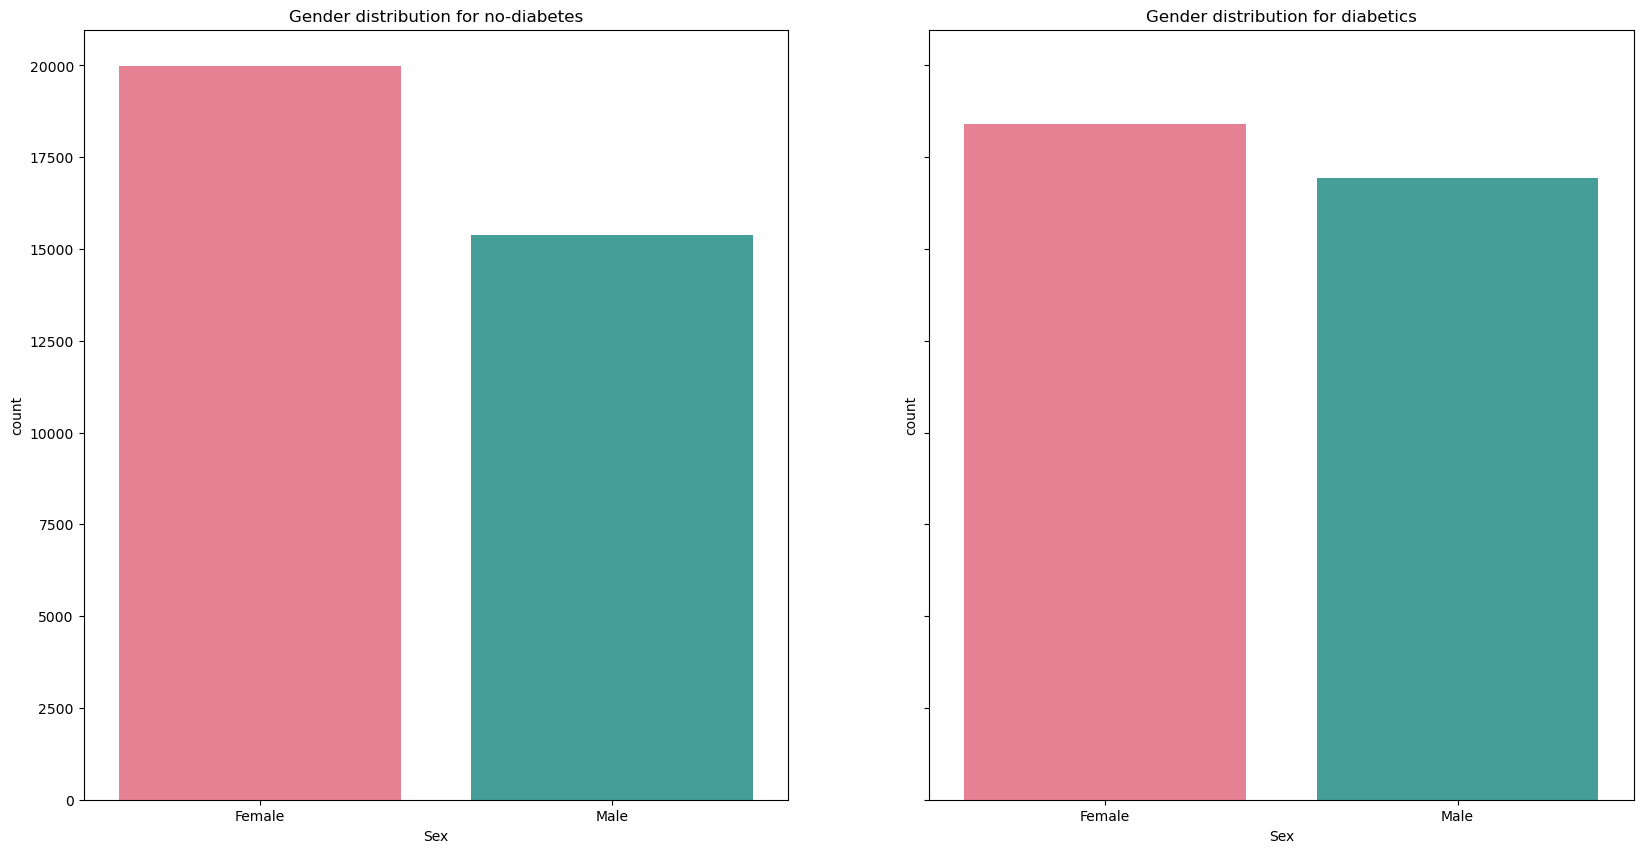

In [5]:
# Lets discover gender distribution 
fig, (ax1, ax2) = plt.subplots(1,2, sharey=True, figsize=(20,10))
ax1 = sns.countplot(data=df_no, x='Sex', ax=ax1, palette='husl')
ax1.set(title='Gender distribution for no-diabetes')
ax1.set_xticklabels(['Female', 'Male'])

ax2 = sns.countplot(data=df_yes, x='Sex', ax=ax2, palette='husl')
ax2.set(title='Gender distribution for diabetics')
ax2.set_xticklabels(['Female', 'Male'])
plt.show()

# Age

[Text(0, 0, '18-24'),
 Text(1, 0, '25-29'),
 Text(2, 0, '30-34'),
 Text(3, 0, '35-39'),
 Text(4, 0, '40-44'),
 Text(5, 0, '45-49'),
 Text(6, 0, '50-54'),
 Text(7, 0, '55-59'),
 Text(8, 0, '60-64'),
 Text(9, 0, '65-69'),
 Text(10, 0, '70-74'),
 Text(11, 0, '75-79'),
 Text(12, 0, '>80')]

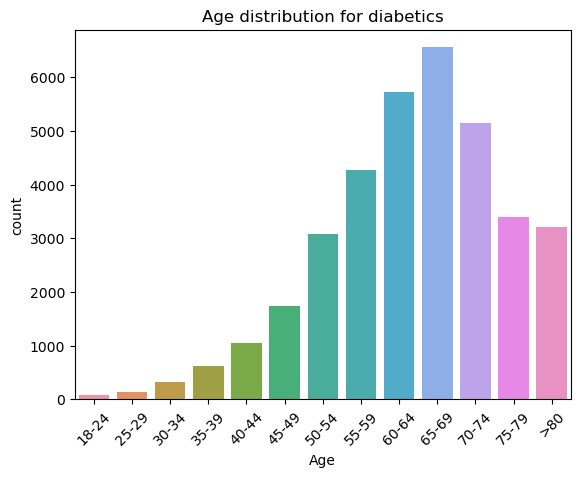

In [6]:
# Check age distribution for people with diabetes
ax = sns.countplot(data=df_yes, x='Age')
ax.set(title= 'Age distribution for diabetics')
ax.set_xticklabels(['18-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '>80'], rotation = 45)

# BMI

(15.0, 60.0)

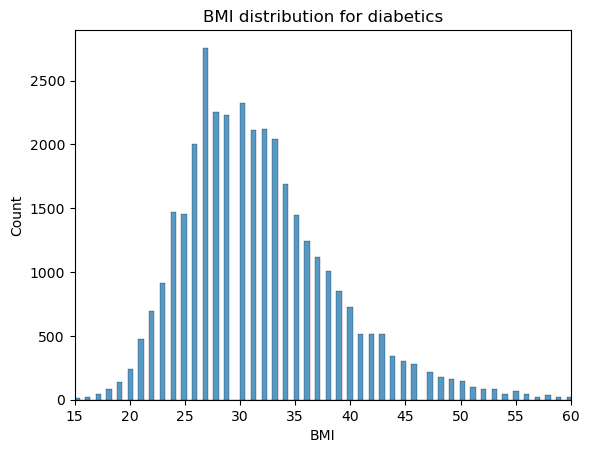

In [7]:
# Check BMI for people with diabetes. 
# We will remove outliers for better visualization, less than 15 and greater than 60.
sns.histplot(data=df_yes, x='BMI').set(title='BMI distribution for diabetics')
plt.xlim(15, 60)

(15.0, 60.0)

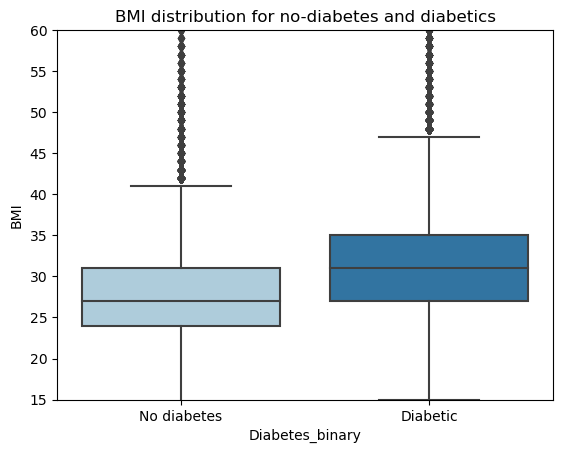

In [8]:
# Compare BMI for people with and without diabetes
ax = sns.boxplot(data=df, x='Diabetes_binary', y='BMI', palette='Paired')
ax.set(title = 'BMI distribution for no-diabetes and diabetics')
ax.set_xticklabels(['No diabetes', 'Diabetic'])
plt.ylim(15, 60)

# High Cholesterol, High Blood Pressure, Smoking, Alcohol Consumption, Physical Activity

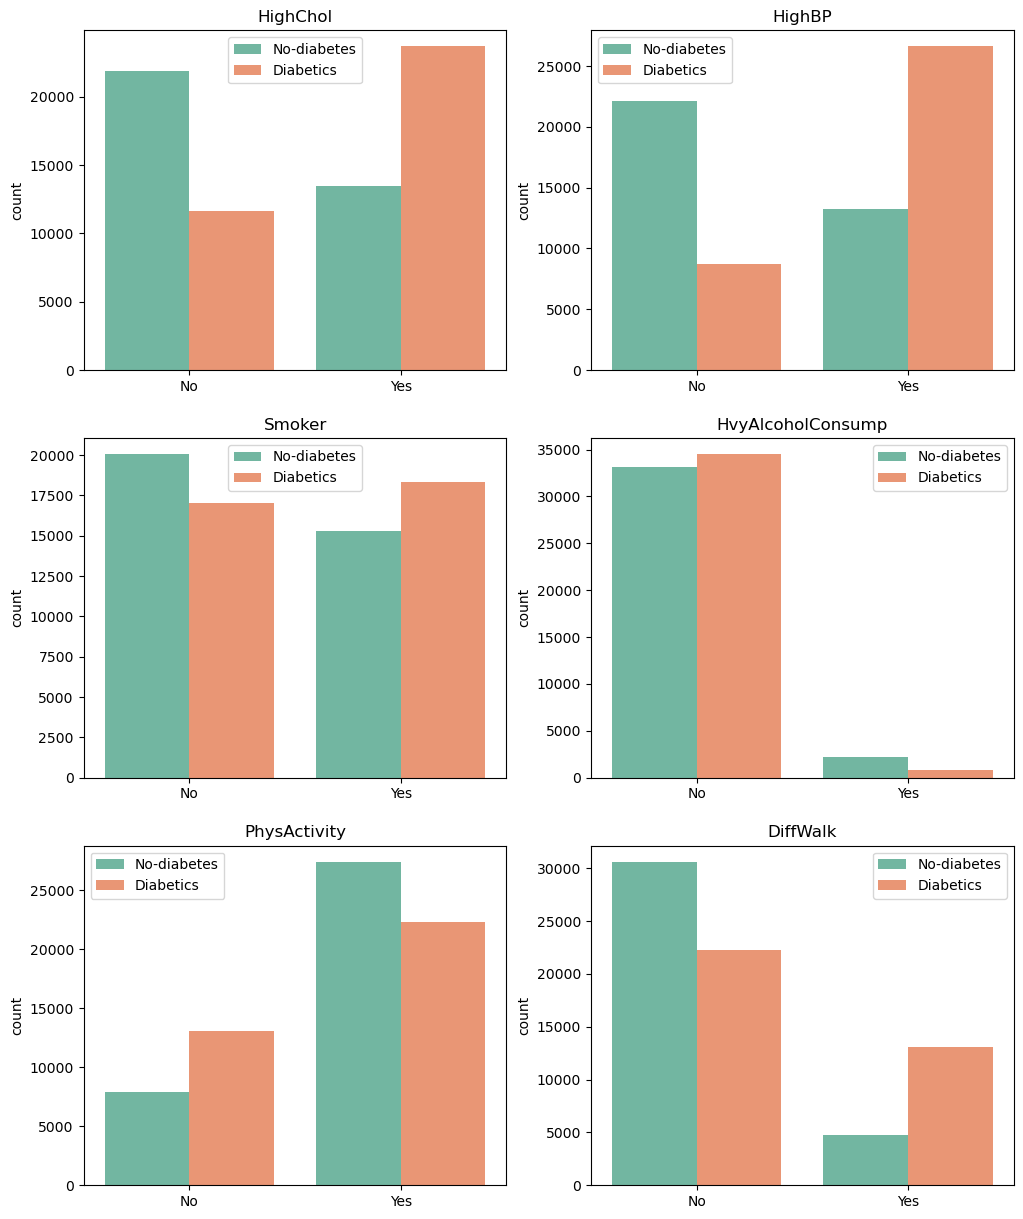

In [9]:
# There are some binary columns that we can visualy compare data between no-diabetes and diabetics.
# Lets iterate from those columns and build plots in one go.

col_names = ['HighChol', 'HighBP', 'Smoker', 'HvyAlcoholConsump', 'PhysActivity', 'DiffWalk']
a = 3 #number of rows
b = 2 #number of columns
c = 1 #plot counter

fig = plt.figure(figsize=(12,15))
for i in col_names:
    plt.subplot(a, b, c)
    ax = sns.countplot(data=df, x=i, hue='Diabetes_binary', palette='Set2')
    ax.set(title = '{}'.format(i))
    ax.set(xlabel=None)
    ax.set_xticklabels(['No', 'Yes'])
    ax.legend(['No-diabetes', 'Diabetics'])
    c = c + 1

    

# Correlation matrix

In [10]:
# Create a correlation matrix
corr_matrix = df.corr()
# Do some conditional formatting for better readability
cm = sns.light_palette("seagreen", as_cmap=True)
corr_matrix_style = corr_matrix.style.background_gradient(cmap = cm)
corr_matrix_style

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
Diabetes_binary,1.000000,0.381516,0.289213,0.115382,0.293373,0.085999,0.125427,0.211523,-0.158666,-0.054077,-0.079293,-0.094853,0.023191,0.040977,0.407612,0.087029,0.213081,0.272646,0.044413,0.278738,-0.170481,-0.224449
HighBP,0.381516,1.000000,0.316515,0.103283,0.241019,0.087438,0.129060,0.210750,-0.136102,-0.040852,-0.066624,-0.027030,0.035764,0.026517,0.320540,0.064294,0.173922,0.234784,0.040819,0.338132,-0.141643,-0.187657
HighChol,0.289213,0.316515,1.000000,0.085981,0.131309,0.093398,0.099786,0.181187,-0.090453,-0.047384,-0.042836,-0.025443,0.031532,0.033199,0.237778,0.083881,0.142610,0.162043,0.017324,0.240338,-0.084386,-0.107777
CholCheck,0.115382,0.103283,0.085981,1.000000,0.045648,-0.004331,0.022529,0.043497,-0.008249,0.017384,0.000349,-0.027146,0.106800,-0.062669,0.059213,-0.010660,0.034540,0.044430,-0.007991,0.101743,-0.008695,0.007550
BMI,0.293373,0.241019,0.131309,0.045648,1.000000,0.011551,0.022931,0.060355,-0.170936,-0.084505,-0.056528,-0.058232,-0.013417,0.065832,0.267888,0.104682,0.161862,0.246094,0.000827,-0.038648,-0.100233,-0.124878
Smoker,0.085999,0.087438,0.093398,-0.004331,0.011551,1.000000,0.064658,0.124418,-0.079823,-0.074811,-0.029926,0.077835,-0.012939,0.035799,0.152416,0.091257,0.120698,0.119789,0.112125,0.105424,-0.140966,-0.104725
Stroke,0.125427,0.129060,0.099786,0.022529,0.022931,0.064658,1.000000,0.223394,-0.079985,-0.008996,-0.047601,-0.023395,0.006484,0.036198,0.189447,0.087303,0.164488,0.192266,0.003822,0.123879,-0.073926,-0.136577
HeartDiseaseorAttack,0.211523,0.210750,0.181187,0.043497,0.060355,0.124418,0.223394,1.000000,-0.098223,-0.019436,-0.036315,-0.037130,0.015687,0.036029,0.275868,0.075057,0.198416,0.232611,0.098161,0.221878,-0.096559,-0.146748
PhysActivity,-0.158666,-0.136102,-0.090453,-0.008249,-0.170936,-0.079823,-0.079985,-0.098223,1.000000,0.133813,0.149322,0.019111,0.027089,-0.063302,-0.273548,-0.130090,-0.234500,-0.276868,0.051753,-0.100753,0.190271,0.196551
Fruits,-0.054077,-0.040852,-0.047384,0.017384,-0.084505,-0.074811,-0.008996,-0.019436,0.133813,1.000000,0.238605,-0.033246,0.029385,-0.045843,-0.098687,-0.062102,-0.048572,-0.050784,-0.088723,0.061096,0.098715,0.079009


<AxesSubplot:>

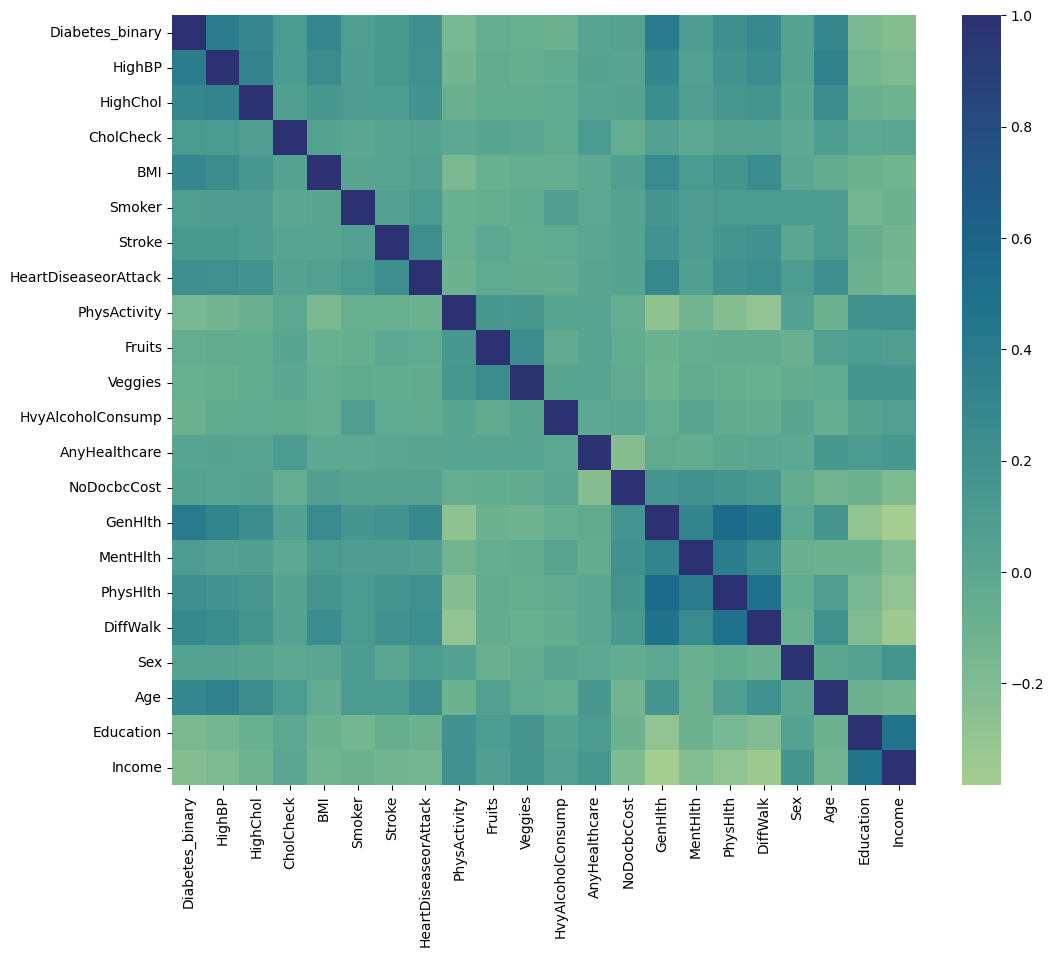

In [11]:
# Visualize relationship between all variables
plt.figure(figsize=(12,10))
sns.heatmap(data=corr_matrix, cmap='crest')

# Observations
* Both females and males are vulnerable to diabetes. 
* Age groups that are most affected by diabetes 60-64, 65-70, 70-74. 
* People with diabetes have higher BMI.
* People with diabetes tend to have high cholesterol levels and high blood pressure.
* Diabetics have fewer physical activities and difficulty walking.
* Smoking and alcohol consumption doesn't affect diabetes status much. 
* Variables correlated with diabetes status are general health, high blood pressure, high cholesterol, BMI, difficulties in walking, and age. 

# Hypothesis testing
Let's set up some hypotheses and test them to determine if our observations are likely to have really occurred based on statistics.

# 1. Do no-diabetes and diabetics have the same BMI?

* H0 - no-diabetes and diabetics have the same average BMI.
* Ha - no-diabetes and diabetics have different average BMI.

In [12]:
# Lets prepare dataset
df_no_bmi = df_no['BMI']
df_yes_bmi = df_yes['BMI']


In [13]:
# Check the average BMI
print('Average BMI for diabetics is {} and no-diabetes is {} '.format(df_yes_bmi.mean(),df_no_bmi.mean()))

Average BMI for diabetics is 31.94401063769592 and no-diabetes is 27.769959825722854 


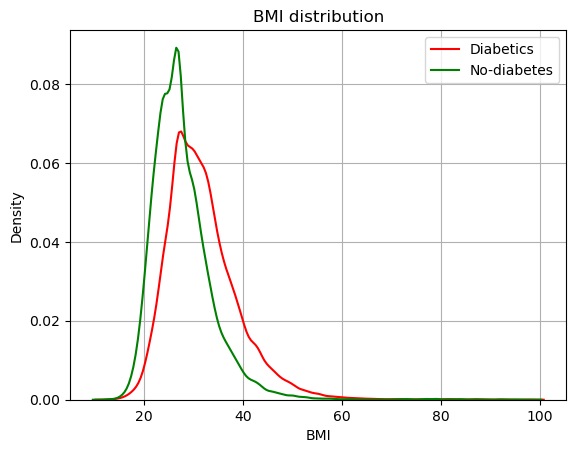

In [14]:
# Check visually how BMI distribution looks like
sns.kdeplot(df_yes_bmi,color='red')
sns.kdeplot(df_no_bmi,color='green')
plt.grid()
plt.title('BMI distribution')
plt.legend(['Diabetics', 'No-diabetes'])

In [15]:
# Now use the ttest since we use one numeric, one categorical variable
ttest,p_value_1  = stats.ttest_ind(df_yes_bmi, df_no_bmi)
if p_value_1 < 0.05:   
    print('Reject Null Hypothesis')
else:
    print('Failed to reject Null Hypothesis')

Reject Null Hypothesis


So, we reject null hypothesis that no-diabetes and diabetics have the same average BMI.

# 2. Do no-diabetes and diabetics have the same number of poor physical health days per month?
* H0 - No-diabetes and diabetics have the same average number of poor physical health days per month.
* Ha - No-diabetes and diabetics have the different average number of poor physical health days per month

In [16]:
# Prepare datasets
df_no_ph = df_no['PhysHlth']
df_yes_ph = df_yes['PhysHlth']

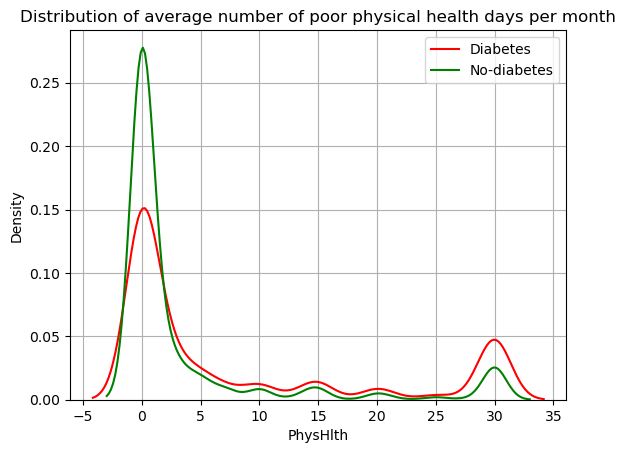

In [17]:
# Check the distribution of average number of poor physical health days per month
sns.kdeplot(df_yes_ph,color='red')
sns.kdeplot(df_no_ph,color='green')
plt.grid()
plt.title('Distribution of average number of poor physical health days per month')
plt.legend(['Diabetes', 'No-diabetes'])

In [18]:
# Count average days
print('Average days of poor physical health for diabetics is {} and no-diabetics is {} '.format(df_yes_ph.mean(),df_no_ph.mean()))

Average days of poor physical health for diabetics is 7.954478583149437 and no-diabetics is 3.666355457477508 


In [19]:
# Use ttest
ttest,p_value_2  = stats.ttest_ind(df_yes_ph, df_no_ph)
if p_value_2 < 0.05:   
    print('Reject Null Hypothesis')
else:
    print('Failed to reject Null Hypothesis')

Reject Null Hypothesis


We reject the null hypothesis that no-diabetes and diabetics have the same average number of poor physical health days per month.

# 3. Is the proportion of high cholesterol significantly different across diabetics and no-diabetes?
* H0 - High cholesterol proportion is not significantly different across diabetics and no-diabetes.
* Ha - High cholesterol proportion is different across diabetics and no-diabetes.

In [20]:
# Prepare data
contingency= pd.crosstab(df.Diabetes_binary, df.HighChol)
contingency

HighChol,0.0,1.0
Diabetes_binary,,
0.0,21869,13477
1.0,11660,23686


Text(0.5, 1.0, 'High cholesterol proportion across diabetics and no-diabetes')

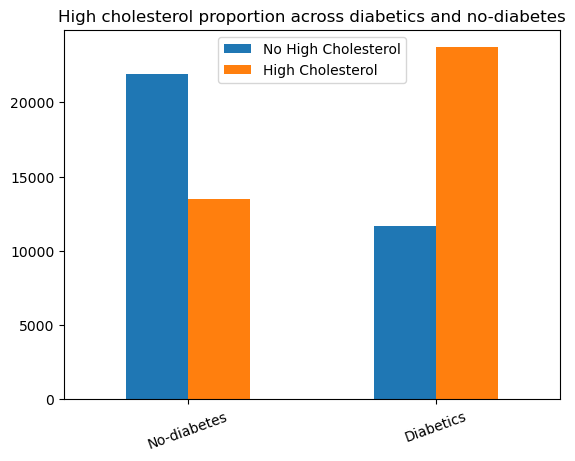

In [21]:
# Visualize high cholesterol proportions
ax = contingency.plot(kind='bar')
ax.set(xlabel=None)
ax.set_xticklabels(['No-diabetes', 'Diabetics'], rotation=20)
ax.legend(['No High Cholesterol', 'High Cholesterol'])
plt.title('High cholesterol proportion across diabetics and no-diabetes')

In [22]:
# Since we have two categorical variables,we will use chi2 test
chi2, p_value_3, dof, exp_freq = chi2_contingency(contingency)
if (p_value_3 < 0.05):
    print('Reject Null Hypothesis')
else:
    print('Failed to reject Null Hypothesis')


Reject Null Hypothesis


We reject the null hypothesis that high cholesterol proportion is not significantly different across diabetics and no-diabetes.

# 4. Is the proportion of high blood pressure significantly different across diabetics and no-diabetes?
* H0 - High blood pressure proportion is not significantly different across diabetics and no-diabetes.
* Ha - High blood pressure proportion is different across diabetics and no-diabetes.

In [23]:
# Prepare data
contingency2= pd.crosstab(df.Diabetes_binary, df.HighBP)
contingency2

HighBP,0.0,1.0
Diabetes_binary,,
0.0,22118,13228
1.0,8742,26604


Text(0.5, 1.0, 'High blood pressure proportion across diabetics and no-diabetes')

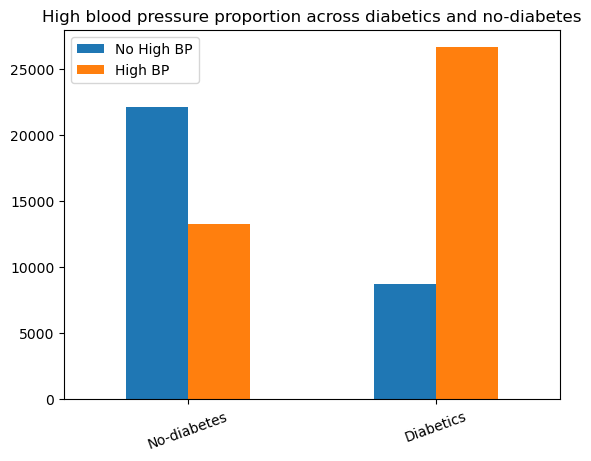

In [24]:
# Visualize proportion of high blood pressure for people with and without diabetes
ax = contingency2.plot(kind='bar')
ax.set(xlabel=None)
ax.set_xticklabels(['No-diabetes', 'Diabetics'], rotation=20)
ax.legend( ['No High BP', 'High BP'])
plt.title('High blood pressure proportion across diabetics and no-diabetes')

In [25]:
# Chi2 test for two categorical variables
chi2, p_value_4, dof, exp_freq = chi2_contingency(contingency2)
if (p_value_4 < 0.05):
    print('Reject Null Hypothesis')
else:
    print('Failed to reject Null Hypothesis')

Reject Null Hypothesis


We reject the null hypothesis that high blood pressure proportion is not significantly different across diabetics and no-diabetes.

# Predictions
Now we will build some models to predict diabetes status based on different variables.

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

In [27]:
# Choose columns for model
df_model = df[['Diabetes_binary', 'HighBP','HighChol', 'BMI', 'GenHlth', 'DiffWalk', 'Age', 'HeartDiseaseorAttack', 'PhysHlth']]

# Train test split
X = df_model.drop('Diabetes_binary', axis=1)
y = df_model['Diabetes_binary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)


In [28]:
# Decision Tree 
model_1 = DecisionTreeClassifier()
model_1.fit(X_train, y_train)

# Calculate model performance
predictions = model_1.predict(X_test)
model_1_score = accuracy_score(y_test, predictions)

print('Accuracy score for Decision Tree is', model_1_score)

Accuracy score for Decision Tree is 0.6801754013720914


In [29]:
# Random Forest
model_2 = RandomForestClassifier()
model_2.fit(X_train, y_train)

# Calculate model performance
predictions = model_2.predict(X_test)
model_2_score = accuracy_score(y_test, predictions)

print('Accuracy score for Random Forest is', model_2_score)

Accuracy score for Random Forest is 0.7097390197326544


In [30]:
# XGB 
model_3 = XGBClassifier()
model_3.fit(X_train, y_train)

# Calculate model performance
predictions = model_3.predict(X_test)
model_3_score = accuracy_score(y_test, predictions)

print('Accuracy score for XGB is', model_3_score)

Accuracy score for XGB is 0.7479312539783577


In [31]:
# SVC 
model_4 = SVC()
model_4.fit(X_train, y_train)

# Calculate model performance
predictions = model_4.predict(X_test)
model_4_score = accuracy_score(y_test, predictions)

print('Accuracy score for SVC is', model_4_score)

Accuracy score for SVC is 0.7470118113020723


In [32]:
# KNeighbors 
model_5 = KNeighborsClassifier()
model_5.fit(X_train, y_train)

# Calculate model performance
predictions = model_5.predict(X_test)
model_5_score = accuracy_score(y_test, predictions)

print('Accuracy score for KNeighbors is', model_5_score)

Accuracy score for KNeighbors is 0.7072635971426551


In [33]:
# MLP
model_6 = MLPClassifier()
model_6.fit(X_train, y_train)

# Calculate model performance
predictions = model_6.predict(X_test)
model_6_score = accuracy_score(y_test, predictions)

print('Accuracy score for MLP is', model_6_score)

Accuracy score for MLP is 0.7436876723955018


In [34]:
# Compare models performance
Models = ['Decision Tree', 'Random Forest', 'XBG', 'SVC', 'KNeighbors', 'MLP']
Scores = [model_1_score, model_2_score, model_3_score, model_4_score, model_5_score, model_6_score]

performance = pd.DataFrame(list(zip(Models, Scores)), columns = ['Models', 'Accuracy_score']).sort_values('Accuracy_score', ascending=False)
performance

,Models,Accuracy_score
2,XBG,0.747931
3,SVC,0.747012
5,MLP,0.743688
1,Random Forest,0.709739
4,KNeighbors,0.707264
0,Decision Tree,0.680175


So, the best-performing model is MLP Classifier with 75% accuracy score.

### Thank you for reading!